In [60]:
import xgboost as xgb
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import numpy as np

In [61]:
train_data = pd.read_csv('train.csv')
train_data_cleaned = train_data.drop(columns=['Id', 'Alley', 'PoolQC', 'Fence', 'MiscFeature'])

In [62]:
train_data_cleaned['LotFrontage'].fillna(train_data_cleaned['LotFrontage'].median(), inplace=True)
train_data_cleaned.fillna(train_data_cleaned.mode().iloc[0], inplace=True)

C:\Users\PPLG15\AppData\Local\Temp\ipykernel_17832\4261990178.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_data_cleaned['LotFrontage'].fillna(train_data_cleaned['LotFrontage'].median(), inplace=True)


In [63]:
categorical_cols = train_data_cleaned.select_dtypes(include=['object']).columns
label_encoder = LabelEncoder()

for col in categorical_cols:
    train_data_cleaned[col] = label_encoder.fit_transform(train_data_cleaned[col])

In [64]:
X = train_data_cleaned.drop('SalePrice', axis=1)
y = train_data_cleaned['SalePrice']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [65]:
xgb_model = xgb.XGBRegressor(
    eval_metric='rmse',
    random_state=42,
    n_estimators=100,
    max_depth=3,
    learning_rate=0.1
)

xgb_model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric='rmse', feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [66]:
y_pred = xgb_model.predict(X_val)

In [67]:
rmse = np.sqrt(mean_squared_error(y_val, y_pred))
print(f"Validation RMSE: {rmse}")

Validation RMSE: 26657.990069836756


In [68]:
test_data = pd.read_csv('test.csv')

In [69]:
test_data_cleaned = test_data.drop(columns=['Id', 'Alley', 'PoolQC', 'Fence', 'MiscFeature'])
test_data_cleaned['LotFrontage'].fillna(test_data_cleaned['LotFrontage'].median(), inplace=True)
test_data_cleaned.fillna(test_data_cleaned.mode().iloc[0], inplace=True)

C:\Users\PPLG15\AppData\Local\Temp\ipykernel_17832\2154703731.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test_data_cleaned['LotFrontage'].fillna(test_data_cleaned['LotFrontage'].median(), inplace=True)


In [70]:
for col in categorical_cols:
    test_data_cleaned[col] = label_encoder.fit_transform(test_data_cleaned[col])

In [71]:
test_predictions = xgb_model.predict(test_data_cleaned)

In [74]:
output = pd.DataFrame({
    'Id': test_data['Id'],
    'SalePrice': test_predictions
})

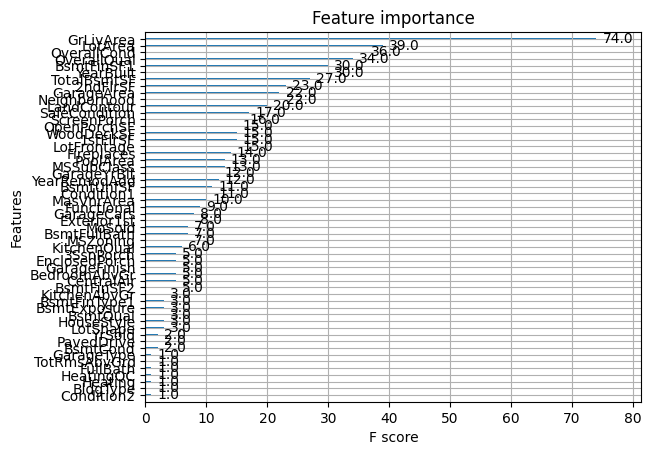

In [73]:
xgb.plot_importance(xgb_model)
plt.show()

Percentage similarity for SalePrice: 98.63%


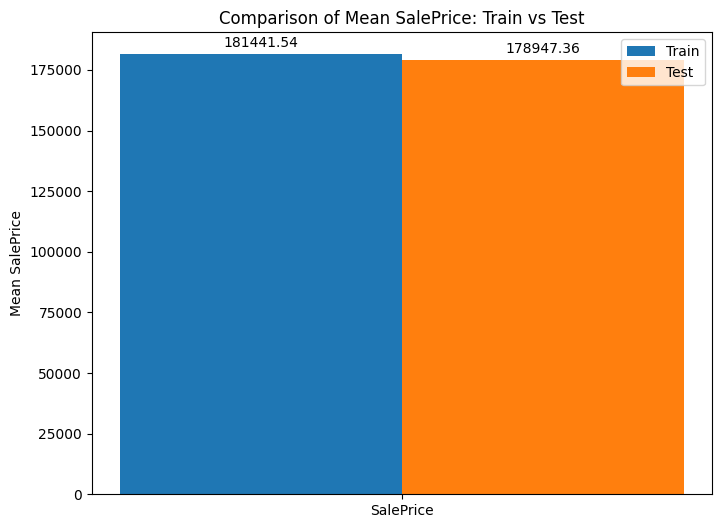

In [81]:
train_values = [train_mean_sale_price]
test_values = [test_mean_sale_price]
labels = ['SalePrice']

percentage_similarity_values = [
    (1 - abs(train_values[i] - test_values[i]) / train_values[i]) * 100 if train_values[i] != 0 else 0
    for i in range(len(train_values))
]

for i, label in enumerate(labels):
    print(f"Percentage similarity for {label}: {percentage_similarity_values[i]:.2f}%")

# Plot comparison bar chart
x = np.arange(len(labels))
width = 0.1

fig, ax = plt.subplots(figsize=(8, 6))

rects1 = ax.bar(x - width/2, train_values, width, label='Train')
rects2 = ax.bar(x + width/2, test_values, width, label='Test')

ax.set_ylabel('Mean SalePrice')
ax.set_title('Comparison of Mean SalePrice: Train vs Test')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

# Add labels on top of the bars
def add_labels(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom')

add_labels(rects1)
add_labels(rects2)

plt.show()

In [80]:
def export_predictions(predictions_df, filename):
    predictions_df.to_csv(filename, index=False)
    print(f"Predictions exported to {filename}")

export_predictions(output, 'predictions.csv')

Predictions exported to predictions.csv
